In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from scipy.stats import ttest_ind
data = pd.read_csv("merged_deaths_factors_final.csv")
data

,State,County,Provisional Drug Overdose Deaths,"Bachelor's degree or higher, 2021","High school diploma only, 2021","Less than a high school diploma, 2021",NET_MIG_2021,N_POP_CHG_2021,Civilian_labor_force_2021,Median_Household_Income_2021,Unemployment_rate_2021
0,ND,Adams,0.0,302.0,591.0,115.0,-21.0,-35.0,976.0,56364.0,2.9
1,ND,Billings,0.0,160.0,227.0,35.0,24.0,28.0,456.0,77375.0,2.4
2,ND,Bottineau,0.0,1090.0,1271.0,299.0,58.0,53.0,2997.0,67400.0,4.0
3,ND,Bowman,0.0,393.0,737.0,202.0,-68.0,-82.0,1602.0,68253.0,2.1
4,ND,Burke,0.0,329.0,450.0,90.0,-37.0,-35.0,1056.0,71492.0,3.6
...,...,...,...,...,...,...,...,...,...,...,...
76,WV,Taylor,104.0,1973.0,5396.0,1415.0,-92.0,-201.0,7782.0,51580.0,4.7
77,WV,Upshur,10.0,2665.0,8299.0,2149.0,96.0,7.0,9629.0,49704.0,6.2
78,WV,Wayne,578.0,4858.0,10780.0,5169.0,-52.0,-331.0,15399.0,49227.0,5.2
79,WV,Wood,546.0,13170.0,21147.0,5639.0,70.0,-351.0,35974.0,53435.0,5.4


In [2]:
#education level
from sklearn.linear_model import LinearRegression
import numpy as np

# Preparing the data for linear regression
X = data[['Bachelor\'s degree or higher, 2021', 'High school diploma only, 2021', 'Less than a high school diploma, 2021']]
y = data['Provisional Drug Overdose Deaths']

# Handling any NaN values
X.fillna(0, inplace=True)
y.fillna(0, inplace=True)

# Linear Regression
model = LinearRegression()
model.fit(X, y)

# Coefficients and Intercept
coefficients = model.coef_

# Creating a DataFrame for the coefficients
coefficients_df = pd.DataFrame({
    'Predictor Category': ['Bachelor\'s Degree or Higher', 'High School Diploma Only', 'Less than a High School Diploma'],
    'Coefficient': coefficients
})

coefficients_df

/var/folders/wz/sjq0k9h94j73klmkswwgw5840000gn/T/ipykernel_75405/2249631725.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.fillna(0, inplace=True)


,Predictor Category,Coefficient
0,Bachelor's Degree or Higher,-0.006199
1,High School Diploma Only,0.004715
2,Less than a High School Diploma,0.157937


In [3]:
#umemployment rate

In [4]:
# Define a threshold to categorize counties into high and low overdose death groups
# The threshold is set as the median of overdose deaths to split the dataset into two roughly equal groups
overdose_death_threshold = data['Provisional Drug Overdose Deaths'].median()

# Splitting the dataset into high and low overdose death groups based on the threshold
high_overdose_deaths = data[data['Provisional Drug Overdose Deaths'] > overdose_death_threshold]
low_overdose_deaths = data[data['Provisional Drug Overdose Deaths'] <= overdose_death_threshold]

# Conduct a t-test for unemployment rate
t_stat_unemployment, p_value_unemployment = ttest_ind(high_overdose_deaths['Unemployment_rate_2021'],
                                                      low_overdose_deaths['Unemployment_rate_2021'],
                                                      equal_var=False) # assuming unequal variance

t_stat_unemployment, p_value_unemployment
df = pd.DataFrame({
    'Statistic': ['t_stat_unemployment'],
    'Value': [t_stat_unemployment],
    'P-value': [p_value_unemployment]
})
df

,Statistic,Value,P-value
0,t_stat_unemployment,6.712007,2.968735e-09


In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert the outcome to a binary variable
median_deaths = data['Provisional Drug Overdose Deaths'].median()
data['Overdose_Death_Rate_Binary'] = np.where(data['Provisional Drug Overdose Deaths'] > median_deaths, 1, 0)

# Selecting the predictor and outcome variable
X = data[['Median_Household_Income_2021']]  # Predictor
y = data['Overdose_Death_Rate_Binary']      # Outcome

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Performing logistic regression
model = LogisticRegression()
model.fit(X_train, y_train)

# Making predictions and evaluating the model
y_pred = model.predict(X_test)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)



/Users/shreyansgupta/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shreyansgupta/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shreyansgupta/.local/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


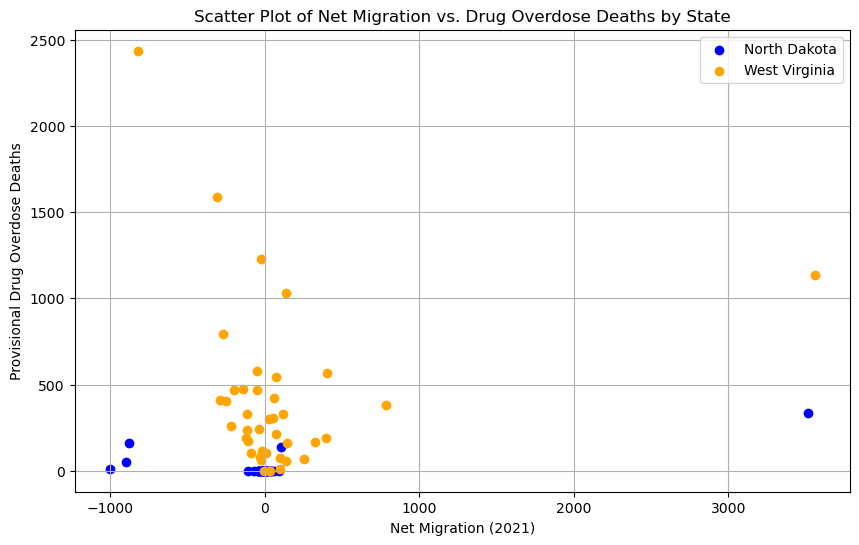

In [6]:
df = pd.DataFrame(data)

# Create a scatter plot with different colors for each state
plt.figure(figsize=(10, 6))
plt.scatter(df[df['State'] == 'ND']['NET_MIG_2021'], df[df['State'] == 'ND']['Provisional Drug Overdose Deaths'], label='North Dakota', color='blue')
plt.scatter(df[df['State'] == 'WV']['NET_MIG_2021'], df[df['State'] == 'WV']['Provisional Drug Overdose Deaths'], label='West Virginia', color='orange')

plt.title('Scatter Plot of Net Migration vs. Drug Overdose Deaths by State')
plt.xlabel('Net Migration (2021)')
plt.ylabel('Provisional Drug Overdose Deaths')
plt.legend()
plt.grid(True)
plt.show()

In [7]:
# for the effect of net migration on provisional drug overdose deaths

# Number of bootstrap samples
n_bootstrap = 1000

effects = []

for _ in range(n_bootstrap):
    # Creating a bootstrap sample: sample with replacement
    sample = data.sample(n=len(data), replace=True)
    
    # Calculating means for net migration and provisional drug overdose deaths
    net_migration_mean = sample['NET_MIG_2021'].mean()
    overdose_deaths_mean = sample['Provisional Drug Overdose Deaths'].mean()

    # Calculating the difference (effect) and storing it
    effect = net_migration_mean - overdose_deaths_mean
    effects.append(effect)

# Calculating the mean effect and the 95% confidence interval
mean_effect = np.mean(effects)
lower_bound = np.percentile(effects, 2.5)
upper_bound = np.percentile(effects, 97.5)

mean_effect, lower_bound, upper_bound

df = pd.DataFrame(data = {
    'Metric': ['Mean Effect', 'Lower Bound', 'Upper Bound'],
    'Value': [mean_effect, lower_bound, upper_bound]
})
df

,Metric,Value
0,Mean Effect,-165.295346
1,Lower Bound,-306.231481
2,Upper Bound,-8.943210
